Import packages
===

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

C:\Users\Daniel\anaconda3\lib\site-packages\xarray\backends\cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


Load Data
---

In [2]:
file = 'chirps_full_WA.nc'
data = xr.open_dataset(file)
data = data['precip'].where(data['precip']!=-99)

In [3]:
data

<xarray.DataArray 'precip' (time: 10958, latitude: 84, longitude: 80)>
array([[[       nan,        nan,        nan, ..., 0.09513035,
         0.18271613, 0.        ],
        [       nan,        nan,        nan, ..., 0.7660875 ,
         0.54629076, 0.        ],
        [       nan,        nan,        nan, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.01122632, 0.0770435 , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[       nan,        nan,        nan, ..., 0.6227504 ,
         2.5817764 , 2.1820595 ],
        [       nan,        nan,        nan, ..., 0.        ,
         2.0366068 , 2.8003762 ],
        [       nan,        nan,        nan, ..., 0.        ,
         0.18811882, 1.1806384 ],
...
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[       nan,        nan,        nan, ..., 0.        ,
         0.        , 0.        ],
        [       nan,        nan,        nan, ..., 0.        ,
         0.        , 0.        ],
        [       nan,        nan,        nan, ..., 0.4054568 ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1991-01-01 1991-01-02 ... 2020-12-31
  * latitude   (latitude) float32 4.125 4.375 4.625 4.875 ... 24.38 24.62 24.88
  * longitude  (longitude) float32 -9.875 -9.625 -9.375 ... 9.375 9.625 9.875
Attributes:
    units:               mm/day
    standard_name:       convective precipitation rate
    long_name:           Climate Hazards group InfraRed Precipitation with St...
    time_step:           day
    geostatial_lat_min:  -50.0
    geostatial_lat_max:  50.0
    geostatial_lon_min:  -180.0
    geostatial_lon_max:  180.0

Create Julian Day (Day of Year) Groupings
===

In [4]:
doy_data = data.mean(['longitude','latitude']).groupby('time.dayofyear')
doy_data

DataArrayGroupBy, grouped over 'dayofyear'
366 groups with labels 1, 2, 3, 4, 5, ..., 363, 364, 365, 366.

In [5]:
# doy_data[365]

### Function for Anomaly Computation & Data Check for inf values

In [6]:
def ano(x,dim):
    return (x-x.mean(dim=dim))

def inf_check(p, grid=True):
    if grid==True:
        p = p.where(p!=np.inf).where(p!=-np.inf)
    else:
        p[np.isinf(p)==True] = np.nan
    return p

Visualisation
===

In [7]:
# list(yearly_data.groups.copy())

In [8]:
# doy_data.mean().dayofyear[0]

In [9]:
inf_check(doy_data.mean(),grid=True)

<xarray.DataArray 'precip' (dayofyear: 366)>
array([0.07778258, 0.08583616, 0.05115154, 0.04753082, 0.08443453,
       0.06027576, 0.07971965, 0.09013351, 0.10306961, 0.11560995,
       0.08630644, 0.05633972, 0.06226293, 0.06636761, 0.07963407,
       0.07113823, 0.04781706, 0.0711197 , 0.07370456, 0.10585141,
       0.16177143, 0.10802011, 0.10230204, 0.08965687, 0.07784171,
       0.1296538 , 0.13160302, 0.16543294, 0.11324219, 0.14755847,
       0.18946575, 0.16475517, 0.20154376, 0.18348299, 0.15271932,
       0.16132697, 0.15666269, 0.1727473 , 0.23673368, 0.24104924,
       0.2524216 , 0.36741412, 0.304485  , 0.30297717, 0.32019138,
       0.35348892, 0.25275156, 0.3050037 , 0.36502555, 0.30470452,
       0.30100593, 0.34678152, 0.3808014 , 0.33688337, 0.34893122,
       0.42733186, 0.35992974, 0.3043693 , 0.38941145, 0.54520166,
       0.52349323, 0.5200608 , 0.528786  , 0.43629792, 0.5707197 ,
       0.54833627, 0.5802147 , 0.7431547 , 0.7192982 , 0.6863384 ,
       0.6290735 , 0.75444233, 0.7303553 , 0.8259923 , 0.7458107 ,
       0.62566084, 0.6869598 , 0.7231439 , 0.6896853 , 0.78816575,
       0.8613283 , 0.7271964 , 0.6603685 , 0.70779634, 0.8828622 ,
       0.76603436, 0.85227674, 0.7253772 , 0.8550481 , 0.96892893,
       0.99221987, 1.1664422 , 1.122246  , 0.9473639 , 0.98593503,
       1.162416  , 1.2490213 , 1.0356777 , 0.9575675 , 1.0137533 ,
...
       2.97789   , 2.7524152 , 3.2935295 , 2.429853  , 2.2161698 ,
       2.2344923 , 2.2200217 , 2.1790738 , 1.900413  , 2.05438   ,
       2.2046165 , 1.9909203 , 2.1808753 , 1.9816475 , 2.112708  ,
       1.7402027 , 1.8476728 , 1.6926818 , 1.6865345 , 1.7063832 ,
       2.061204  , 2.0650945 , 1.7475439 , 1.6125178 , 1.6710409 ,
       1.7972621 , 1.729786  , 1.5493413 , 1.4852592 , 1.5740564 ,
       1.5239048 , 1.7342827 , 1.455578  , 1.453773  , 0.96972966,
       0.73578554, 0.6656449 , 0.6577119 , 0.73081344, 0.56646836,
       0.5172948 , 0.48684505, 0.5642609 , 0.5622523 , 0.49999937,
       0.4725115 , 0.45425338, 0.4377245 , 0.3512117 , 0.4184236 ,
       0.36858046, 0.4381457 , 0.4217404 , 0.39355868, 0.48770988,
       0.4616061 , 0.35841233, 0.36127964, 0.40640414, 0.43773496,
       0.45581093, 0.3161357 , 0.24066831, 0.20224047, 0.26273936,
       0.2886287 , 0.31734583, 0.27974164, 0.24499534, 0.22890592,
       0.1841709 , 0.17607735, 0.17065285, 0.15437868, 0.18443352,
       0.19592838, 0.21576135, 0.18313137, 0.17618965, 0.11333174,
       0.10841625, 0.06886888, 0.11468046, 0.12114636, 0.17826341,
       0.13838413, 0.09805163, 0.07812095, 0.12089439, 0.15434578,
       0.06353455, 0.11329848, 0.08172281, 0.08613954, 0.09803502,
       0.11292637], dtype=float32)
Coordinates:
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366

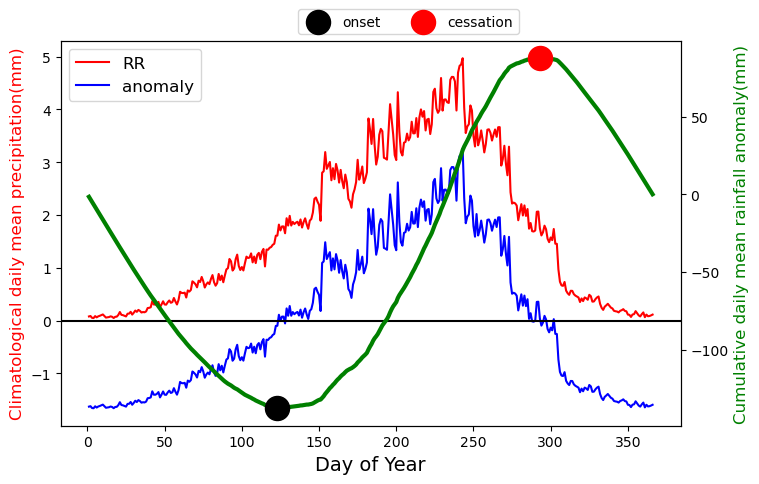

In [10]:
x = list(doy_data.groups.copy())
fig, ax = plt.subplots(figsize=(8,5))

avg_data = inf_check(doy_data.mean(),grid=True)
avg_data.plot(ax = ax,color='r',label='RR')
ano(avg_data,dim='dayofyear').plot(ax = ax, color='b', label='anomaly')

# legend
ax.legend(loc='upper left', fontsize=12)
ax.set_ylabel('Climatological daily mean precipitation(mm)', color='r', fontsize=12 )
# # ax.set_ylabel('Climatological daily mean precipitation anomaly(mm/day)', color='b', ha ='left', fontsize=12)

ax.set_xlabel('Day of Year', fontsize=14)


ax.axhline(y=0, color='k')   #horizontal black line at the zero mark


ax1 = ax.twinx()
anom = ano(avg_data, dim='dayofyear').cumsum()
ax1.plot(x, anom, color='g', linewidth=3)
ax1.set_ylabel('Cumulative daily mean rainfall anomaly(mm)', fontsize=12, color='g')     #set labe
            

#Onset and Cessation Detection                 
anomaly = anom.values
dx = 28 #Detection window (we use a nearly monthly interval to avoid multiple mind-month false onset)                
onset = []; cessation=[]
for i in range(dx,len(anomaly)-dx):
    if np.min(anomaly[i-dx:i+dx]) == anomaly[i]:
        onset.append([i+1,anomaly[i+1]])
    if np.max(anomaly[i-dx:i+dx]) == anomaly[i]:
       cessation.append([i+1, anomaly[i+1]])    
            
ax1.scatter(np.copy(onset).T[0],np.copy(onset).T[1], 300, color='k', zorder=5, label='onset')              
ax1.scatter(np.copy(cessation).T[0],np.copy(cessation).T[1], 300, color='r', zorder=5, label='cessation')
ax1.legend(loc=1, ncol=2, bbox_to_anchor=(0.75, 1.1))      

                

In [22]:
cessation[0]

[294, 97.75629]

In [24]:
onset[0]

[130, -152.5238]

Checking how it will look like as a subplot
===

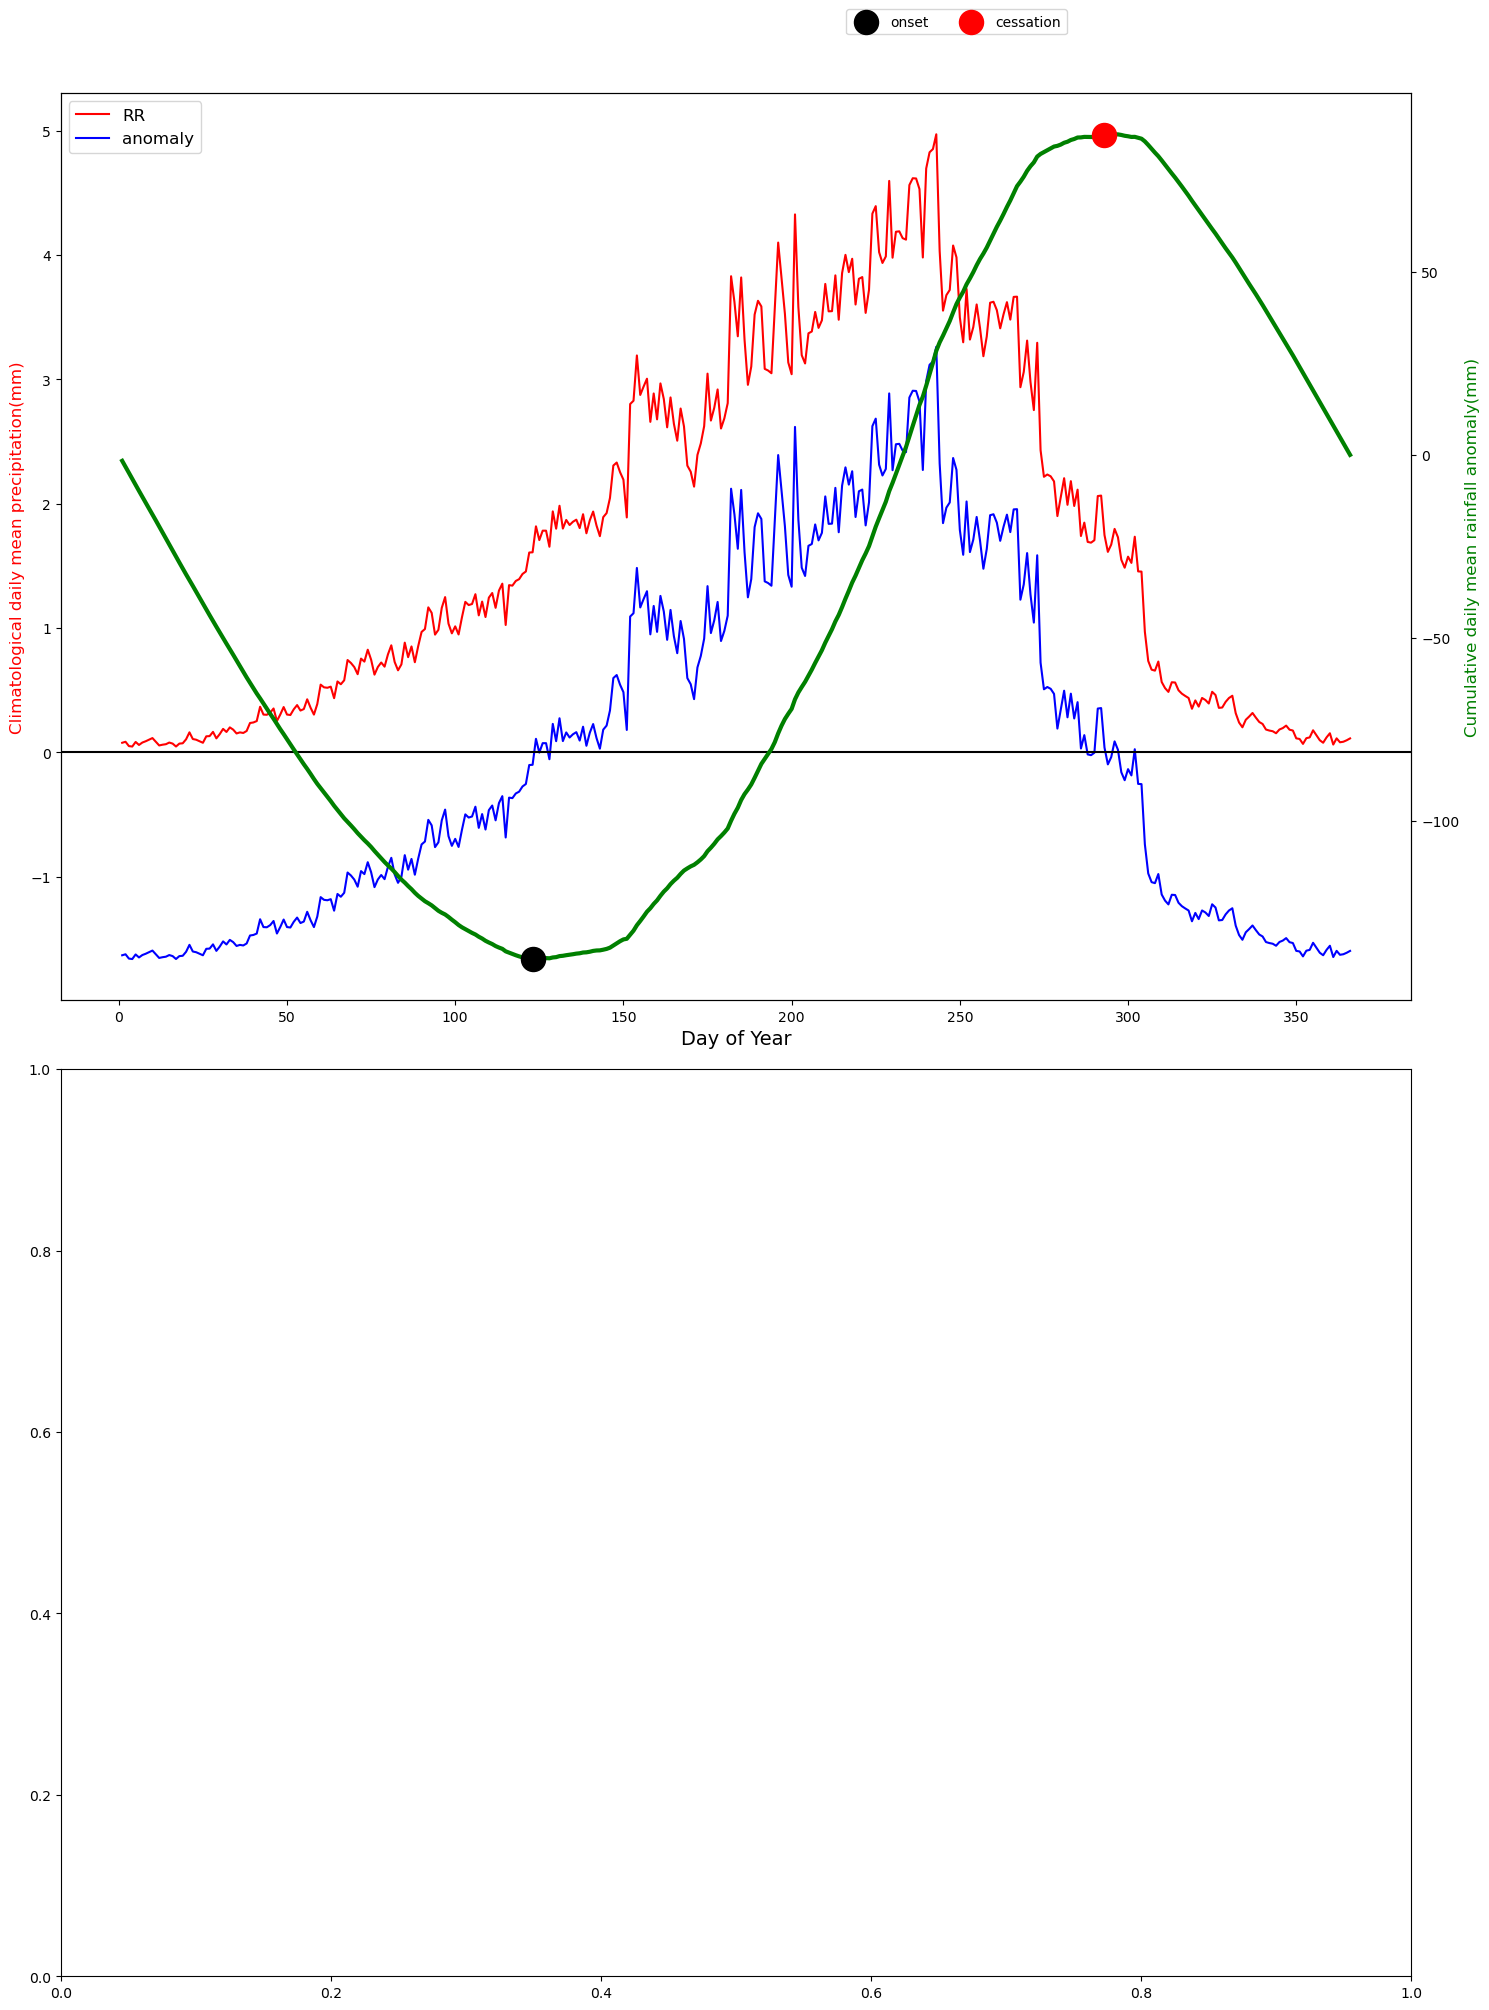

In [12]:
x = list(doy_data.groups.copy())
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(15,20))

ax=axes[0]
avg_data = inf_check(doy_data.mean(),grid=True)
avg_data.plot(ax = ax,color='r',label='RR')
ano(avg_data,dim='dayofyear').plot(ax = ax, color='b', label='anomaly')

# legend
ax.legend(loc='upper left', fontsize=12)
ax.set_ylabel('Climatological daily mean precipitation(mm)', color='r', fontsize=12 )
# # ax.set_ylabel('Climatological daily mean precipitation anomaly(mm/day)', color='b', ha ='left', fontsize=12)

ax.set_xlabel('Day of Year', fontsize=14)


ax.axhline(y=0, color='k')   #horizontal black line at the zero mark


ax1 = ax.twinx()
anom = ano(avg_data, dim='dayofyear').cumsum()
ax1.plot(x, anom, color='g', linewidth=3)
ax1.set_ylabel('Cumulative daily mean rainfall anomaly(mm)', fontsize=12, color='g')     #set labe


#Onset and Cessation Detection                 
anomaly = anom.values
dx = 28 #Detection window (we use a nearly monthly interval to avoid multiple mind-month false onset)                
onset = []; cessation=[]
for i in range(dx,len(anomaly)-dx):
    if np.min(anomaly[i-dx:i+dx]) == anomaly[i]:
        onset.append([i+1,anomaly[i+1]])
    if np.max(anomaly[i-dx:i+dx]) == anomaly[i]:
       cessation.append([i+1, anomaly[i+1]])    

ax1.scatter(np.copy(onset).T[0],np.copy(onset).T[1], 300, color='k', zorder=5, label='onset')              
ax1.scatter(np.copy(cessation).T[0],np.copy(cessation).T[1], 300, color='r', zorder=5, label='cessation')
ax1.legend(loc=1, ncol=2, bbox_to_anchor=(0.75, 1.1))      

# axes[0].plot(x,avg_data, color='r',label='RR')
# axes[0].plot(x, anom)
plt.show
plt.tight_layout()

In [13]:
# onset

In [14]:
# cessation

Determining onset and cessation on a yearly basis
===

In [15]:
yearly_data = data.mean(['longitude','latitude']).groupby('time.year')
yearly_data

DataArrayGroupBy, grouped over 'year'
30 groups with labels 1991, 1992, 1993, ..., 2019, 2020.

In [16]:
# yearly_data[1991]

Generating the plot for only 1991
===

In [17]:
# This is for 1991
yearly_data91 = yearly_data[1991]

# yearly_data91

In [18]:
doy_data91 = yearly_data91.groupby('time.dayofyear')
# doy_data91[290]

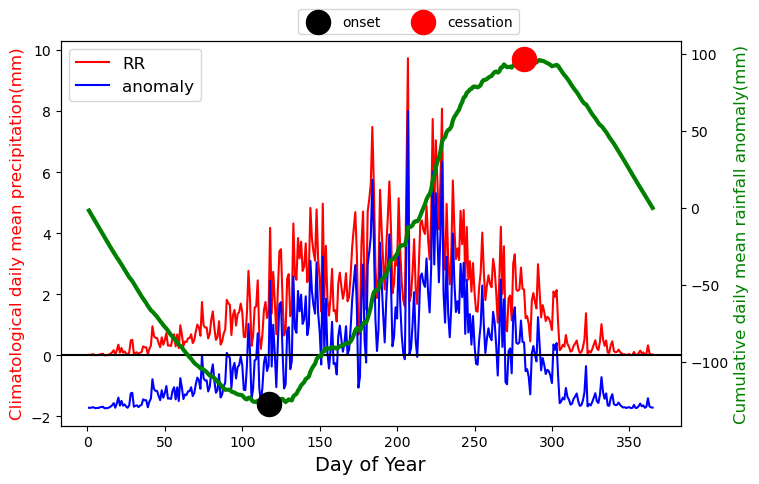

In [19]:
x = list(doy_data91.groups.copy())   #This is the Julian calender 
fig, ax = plt.subplots(figsize=(8,5))

avg_data = inf_check(doy_data91.mean(),grid=True)
avg_data.plot(ax = ax,color='r',label='RR')
ano(avg_data,dim='dayofyear').plot(ax = ax, color='b', label='anomaly')

# legend
ax.legend(loc='upper left', fontsize=12)
ax.set_ylabel('Climatological daily mean precipitation(mm)', color='r', fontsize=12 )
# # ax.set_ylabel('Climatological daily mean precipitation anomaly(mm/day)', color='b', ha ='left', fontsize=12)

ax.set_xlabel('Day of Year', fontsize=14)


ax.axhline(y=0, color='k')   #horizontal black line at the zero mark


ax1 = ax.twinx()
anom = ano(avg_data, dim='dayofyear').cumsum()
ax1.plot(x, anom, color='g', linewidth=3)
ax1.set_ylabel('Cumulative daily mean rainfall anomaly(mm)', fontsize=12, color='g')     #set labe
            

#Onset and Cessation Detection                 
anomaly = anom.values
dx = 28 #Detection window (we use a nearly monthly interval to avoid multiple mind-month false onset)                
onset = []; cessation=[]
for i in range(dx,len(anomaly)-dx):
    if np.min(anomaly[i-dx:i+dx]) == anomaly[i]:
        onset.append([i+1,anomaly[i+1]])
    if np.max(anomaly[i-dx:i+dx]) == anomaly[i]:
       cessation.append([i+1, anomaly[i+1]])    
            
ax1.scatter(np.copy(onset).T[0],np.copy(onset).T[1], 300, color='k', zorder=5, label='onset')              
ax1.scatter(np.copy(cessation).T[0],np.copy(cessation).T[1], 300, color='r', zorder=5, label='cessation')
ax1.legend(loc=1, ncol=2, bbox_to_anchor=(0.75, 1.1))      


In [25]:
onset[0]

[130, -152.5238]

In [26]:
cessation[0]

[294, 97.75629]

Generating The Subplot for Each Year in 30 Years
===

In [20]:
for y, ax in zip(yearly_data,axes.flatten()):
    print(y)

(1991, <xarray.DataArray 'precip' (time: 365)>
array([1.46444598e-02, 1.20266713e-02, 2.77158078e-02, 3.13910544e-02,
       1.65776059e-03, 1.02630826e-02, 7.99425133e-03, 2.89587509e-02,
       3.75277549e-02, 4.94428091e-02, 5.38689317e-04, 3.21304705e-03,
       4.36036335e-03, 2.44430043e-02, 5.40029481e-02, 9.96537879e-02,
       1.67689651e-01, 1.81846451e-02, 1.58438221e-01, 3.48720312e-01,
       8.69385824e-02, 2.39860073e-01, 8.56298134e-02, 1.25894204e-01,
       5.44336364e-02, 1.56115368e-02, 9.34884474e-02, 4.86970514e-01,
       5.06420135e-01, 5.11357598e-02, 7.66888261e-02, 9.64895338e-02,
       3.75049300e-02, 8.62626880e-02, 1.07944384e-01, 2.93045670e-01,
       2.61966556e-01, 2.61120856e-01, 3.11169531e-02, 2.08626136e-01,
       3.19117457e-01, 9.50724006e-01, 6.28521442e-01, 5.68839431e-01,
       5.67055047e-01, 3.97138953e-01, 2.63640732e-01, 5.88777661e-01,
       3.44149321e-01, 5.02240539e-01, 7.27802753e-01, 3.14511746e-01,
       3.23713124e-01, 3.03589

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

<function matplotlib.pyplot.show(close=None, block=None)>

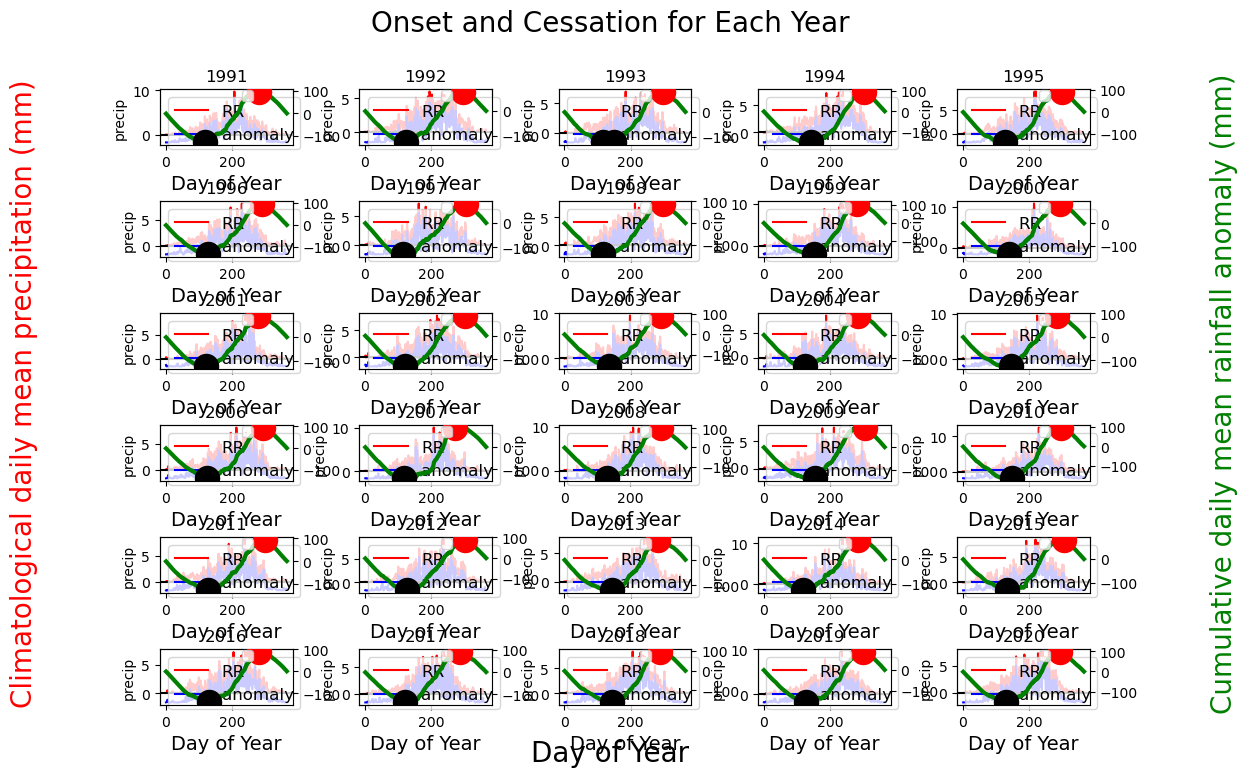

In [21]:
count = 0
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(12, 8))
fig.suptitle('Onset and Cessation for Each Year', fontsize=20)
fig.text(0, 0.5, 'Climatological daily mean precipitation (mm)', va='center', rotation='vertical', fontsize=20, color='r')
fig.text(1, 0.5, 'Cumulative daily mean rainfall anomaly (mm)', va='center', rotation='vertical', fontsize=20, color='g')
fig.text(0.5, 0.04, 'Day of Year', ha='center', fontsize=20)
plt.subplots_adjust(wspace=0.5, hspace=1)

for y, ax in zip(yearly_data,axes.flatten()):
#     if count < len(axes):
#     ax = axes[count // 5, count % 5]  # Access the appropriate subplot based on count

   
    year = y[0]  # Extract the year from the data
    y1 = y[1].groupby('time.dayofyear').sum('time')
    x = y1.dayofyear
    #x = list(doy_data91.groups.copy())

    avg_data = inf_check(y1, grid=True)
    avg_data.plot(ax=ax, color='r', label='RR')
    ano(avg_data, dim="dayofyear").plot(ax=ax, color='b', label='anomaly')

    # Legend
    ax.legend(loc='upper left', fontsize=12)
#     ax.set_ylabel('Climatological daily mean precipitation(mm)', color='r', fontsize=12)
    ax.set_xlabel('Day of Year', fontsize=14)
    ax.axhline(y=0, color='k')  # Horizontal black line at the zero mark

    ax1 = ax.twinx()
    anom = ano(avg_data, dim='dayofyear').cumsum()
    ax1.plot(x, anom, color='g', linewidth=3)
#     ax1.set_ylabel('Cumulative daily mean rainfall anomaly(mm)', fontsize=12, color='g')  # Set label

    # Onset and Cessation Detection
    anomaly = anom.values
    dx = 28  # Detection window (we use a nearly monthly interval to avoid multiple mid-month false onset)
    onset = []
    cessation = []
    for i in range(dx, len(anomaly) - dx):
        if np.min(anomaly[i - dx:i + dx]) == anomaly[i]:
            onset.append([i + 1, anomaly[i + 1]])
        if np.max(anomaly[i - dx:i + dx]) == anomaly[i]:
            cessation.append([i + 1, anomaly[i + 1]])

    ax1.scatter(np.copy(onset).T[0], np.copy(onset).T[1], 300, color='k', zorder=5)
    ax1.scatter(np.copy(cessation).T[0],np.copy(cessation).T[1], 300, color='r', zorder=5) #label='cessation')
    ax1.legend(loc=1, ncol=2, bbox_to_anchor=(0.75, 1.1))
    
    ax.set_title(str(year))  # Set the subplot title as the year
    count += 1
# filterwarnings('ignore')    
    
plt.show


In [27]:
onset[0]

[130, -152.5238]

In [43]:
# axes[0,0].onset[0]

y_data = axes[0, 0].get_lines()[0].get_ydata()
y_data

array([1.46444598e-02, 1.20266713e-02, 2.77158078e-02, 3.13910544e-02,
       1.65776059e-03, 1.02630826e-02, 7.99425133e-03, 2.89587509e-02,
       3.75277549e-02, 4.94428091e-02, 5.38689317e-04, 3.21304705e-03,
       4.36036335e-03, 2.44430043e-02, 5.40029481e-02, 9.96537879e-02,
       1.67689651e-01, 1.81846451e-02, 1.58438221e-01, 3.48720312e-01,
       8.69385824e-02, 2.39860073e-01, 8.56298134e-02, 1.25894204e-01,
       5.44336364e-02, 1.56115368e-02, 9.34884474e-02, 4.86970514e-01,
       5.06420135e-01, 5.11357598e-02, 7.66888261e-02, 9.64895338e-02,
       3.75049300e-02, 8.62626880e-02, 1.07944384e-01, 2.93045670e-01,
       2.61966556e-01, 2.61120856e-01, 3.11169531e-02, 2.08626136e-01,
       3.19117457e-01, 9.50724006e-01, 6.28521442e-01, 5.68839431e-01,
       5.67055047e-01, 3.97138953e-01, 2.63640732e-01, 5.88777661e-01,
       3.44149321e-01, 5.02240539e-01, 7.27802753e-01, 3.14511746e-01,
       3.23713124e-01, 3.03589970e-01, 5.80067754e-01, 6.86509848e-01,
      